In [3]:
!pip install matplotlib

    100% |████████████████████████████████| 14.9MB 24kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 1.0MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.0MB/s ta 0:00:011
  Running setup.py bdist_wheel for subprocess32 ... done
  Stored in directory: /home/efrain/.cache/pip/wheels/7d/4c/a4/ce9ceb463dae01f4b95e670abd9afc8d65a45f38012f8030cc
Successfully built subprocess32


In [4]:
%matplotlib inline

import pandas as pd

# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [5]:
data = pd.read_table('checkins.txt', delim_whitespace=True,header=None,names=['user_id','venue_id'])

In [6]:
data.head()

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


In [7]:
data['checkin'] = 1

In [8]:
len(data['user_id'].unique())

2060

In [9]:
my_list = [1, 1, 1, 2, 3]

In [10]:
set(my_list)

{1, 2, 3}

In [11]:
data.groupby(['user_id', 'venue_id']).count()

checkin
user_id venue_id         
6       278             2
15      910             1
        1070            1
        1254            2
        1329            1
        11660           1
        12508           1
25      16625           1
        47540           1
        72623           1
72      4283            2
        5004            2
        12222           2
        16983           1
        73254           2
99      577             1
        1085            1
        1316            1
        4529            1
        10786           1
        16699           1
102     1372            2
        1376            2
        3246            1
        4513            4
        5608            1
        7578            1
        7594            1
        10814           2
        10965           1
...                   ...
265904  140749         16
265965  200             2
        1073            2
        1129            1
        3362            1
        5867            2
        6305            2
        6403            1
        8702            1
        11734           2
        12222           1
        13826           1
        32742           2
        51660           2
        667293          2
266532  925             1
        4310            2
        10604           2
        11942           1
        19182          14
        21041           1
        22768           2
        47026           4
266576  10289           1
        17779           1
        34553           1
266712  4889            2
        8228            1
        9953            2
        10969           1

[13472 rows x 1 columns]

In [12]:
data = data.drop_duplicates()

In [13]:
data.shape

(13472, 3)

# Transformar

In [14]:
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [15]:
len(set(data['user_id']))

2060

In [16]:
len(set(data['venue_id']))

2876

In [17]:
checkins_matrix = data.reset_index()\
    .pivot(index='venue_id', columns='user_id', values='checkin')\
    .fillna(0)\
    .astype(int)

In [18]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
checkins_matrix.shape

(2876, 2060)

In [20]:
checkins_matrix.sum(axis=1)

venue_id
15          1
20         20
25         29
26          2
36         10
39          2
40          4
42          8
46         16
47         14
52          2
59          2
77          6
78          4
83          4
86          6
88          2
98          3
99          2
102         1
105        10
114         8
115         9
123        12
133         3
138         6
141         2
142         7
148         5
154         2
           ..
1170409     1
1210157     2
1225401     1
1283376     6
1285202     1
1337942     1
1443163     2
1450342     5
1598475     2
1654176     4
1719875     1
1742184     1
1760748    16
1782104     5
1809245     2
1930899     1
1930905     1
1944209     1
1945122     1
1948043     4
1995366     4
2053266     1
2067414     2
2133943     1
2154515     5
2167106     1
2232344     1
2302016     1
2376156     1
2422200     1
Length: 2876, dtype: int64

# Visualizar

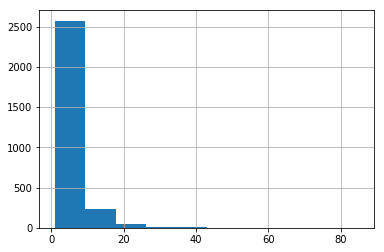

In [21]:
checkins_matrix.sum(1).hist()

# Computar similaridades

In [22]:
venue_1 = {1, 2, 4}

In [23]:
venue_2 = {3, 2, 4}

In [24]:
intersection = venue_1.intersection(venue_2)

In [25]:
len(intersection)

2

In [26]:
union = venue_1.union(venue_2)

In [27]:
len(union)

4

In [28]:
len(intersection) / len(union)

0

In [23]:
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index )
    venue_2_user_indices = set( venue_2[venue_2 > 0].index )
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))
    
    return intersection_length / union_length

In [39]:
venue1 = checkins_matrix.ix[26]

In [58]:
venue1.ix[214471]

1

In [43]:
set( venue1[venue1 > 0].index )

{65514, 214471}

In [24]:
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.ix[query_venue_index]
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
        
    return pd.Series(similarities)

# Recomendar

In [25]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
while True:
    try:
        query_venue_index = int( input('Please enter a query venue index: ') )
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass

Please enter a query venue index: 26
2606      0.500000
12142     0.250000
96751     0.166667
32869     0.166667
407167    0.166667
dtype: float64
